In [1]:
#Import libraries
from io import StringIO
import requests
import json
import pandas as pd

In [2]:
df_opioids = pd.read_csv('opioids.csv', sep=",")

In [3]:
df_opioids.head()

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN


In [6]:
#load overdose data
df_overdose = pd.read_csv('overdoses.csv', sep=",")

In [7]:
df_overdose.head()

,State,Population,Deaths,Abbrev
0,Alabama,"4,833,722",723,AL
1,Alaska,"735,132",124,AK
2,Arizona,"6,626,624","1,211",AZ
3,Arkansas,"2,959,373",356,AR
4,California,"38,332,521","4,521",CA


In [8]:
#load prescriber info
df_prescriber = pd.read_csv('prescriber-info.csv', sep=",")

In [9]:
df_prescriber.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [11]:

# Let's start out by removing the ',' from our numbers in the Deaths and Population columns so that we can use them as integers
df_overdose['Deaths'] = df_overdose['Deaths'].str.replace(',', '')
df_overdose['Deaths'] = df_overdose['Deaths'].astype(int)

In [12]:
df_overdose['Population'] = df_overdose['Population'].str.replace(',', '')
df_overdose['Population'] = df_overdose['Population'].astype(int)

In [14]:
#Adding an additional column where we see the deaths per capita per each state
df_overdose['Deaths/Population'] = (df_overdose['Deaths']/df_overdose['Population'])

In [15]:

#Let's take a look at the states. Why are there more than 50 states?
df_prescriber.State.unique()

array(['TX', 'AL', 'NY', 'AZ', 'NV', 'PA', 'NH', 'WI', 'PR', 'CO', 'OH',
       'MA', 'CT', 'FL', 'MN', 'UT', 'IA', 'IL', 'MT', 'IN', 'VA', 'CA',
       'OR', 'NE', 'MI', 'NM', 'TN', 'KS', 'LA', 'MD', 'MO', 'AR', 'NC',
       'NJ', 'SC', 'WY', 'ME', 'OK', 'ND', 'KY', 'GA', 'DE', 'WA', 'RI',
       'WV', 'AK', 'ID', 'VT', 'HI', 'MS', 'DC', 'SD', 'AE', 'ZZ', 'GU',
       'AA', 'VI'], dtype=object)

In [17]:
df_overdose.Abbrev.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [18]:
#Clean up states and make the dataset state list equal.
#I checked the list of US state abbreviations and did not recognize PR, AE, ZZ, GU, AA or VI. 
#After checking I learned that PR is Puerto Rico, GU is Guam and VI is Virgin Islands.
#Though I identified 3 of the 6 unknowns, I'll remove all of them as dataset 2 does not have data regarding 
#PR, GU or VI.
df_prescriber = df_prescriber[df_prescriber.State != 'AE']
df_prescriber = df_prescriber[df_prescriber.State != 'ZZ']
df_prescriber = df_prescriber[df_prescriber.State != 'AA']
df_prescriber = df_prescriber[df_prescriber.State != 'PR']
df_prescriber = df_prescriber[df_prescriber.State != 'GU']
df_prescriber  = df_prescriber [df_prescriber .State != 'VI']

In [19]:
df_prescriber.State.unique()

array(['TX', 'AL', 'NY', 'AZ', 'NV', 'PA', 'NH', 'WI', 'CO', 'OH', 'MA',
       'CT', 'FL', 'MN', 'UT', 'IA', 'IL', 'MT', 'IN', 'VA', 'CA', 'OR',
       'NE', 'MI', 'NM', 'TN', 'KS', 'LA', 'MD', 'MO', 'AR', 'NC', 'NJ',
       'SC', 'WY', 'ME', 'OK', 'ND', 'KY', 'GA', 'DE', 'WA', 'RI', 'WV',
       'AK', 'ID', 'VT', 'HI', 'MS', 'DC', 'SD'], dtype=object)

In [20]:

#Check out how many credentials there are.
df_prescriber.Credentials.unique()

array(['DDS', 'MD', 'M.D.', 'DO', 'RN, MSN, ANP-BC', 'O.D.', nan,
       'D.D.S.', 'ACNP', 'DPM', 'PAC', 'A.R.N.P.', 'MSN, APRN, BC',
       'D.O.', 'M.D,', 'APRN', 'PA-C', 'CNM', 'RN CNP', 'DDS MS',
       'DNP, APRN-BC, FNP', 'PHARM D.', 'CRNP', 'ARNP', 'D.D.S', 'DPM MD',
       'FNP', 'NP', 'DMD', 'PA', 'MPT', 'D.M.D.', 'APRN BC FNP',
       'DMD,FAGD', 'MD,MPH', 'BDS,  DDS', 'D.D.S., F.A.G.D.', 'DDS, MD',
       'PMH, CNP/CNS', 'P.A.', 'M.D', 'D.O., MPH & TM', 'M.D., PH.D.',
       'RPA-C', 'MD FACOG', 'F.N.P.', 'D.O', 'ANP', 'FNP-C', 'D.M.D',
       'D.P.M.', 'OD', 'O. D.', 'CNS', 'MS, APRN, FNP-C', 'MD MPH',
       'NP-C', 'PHARM D', 'M.D.,', 'MBBS', 'PHYSICIAN ASSISTANT',
       'M.D. FCCP', 'MD.', 'CNP', 'DPT', 'D.D.S, M.D.', 'APRN, BC',
       'P.A.-C', 'M.D.P.A.', 'F.N.P.-C', 'M. D.', 'CFNP', 'C.N.P', 'APN',
       'D.D.S., A.P.C.', 'NP-C, MSN', 'MD FACP', 'R.P.A.', 'N.P.',
       'APRN, CNS', 'D.D.S., M.D.', 'PMHNP', 'MD, PHD, ABFP', 'APNP',
       'DMD, MD, PLLC', 'M.D., P.

In [21]:
#Check out the specialties.
df_prescriber.Specialty.unique()

array(['Dentist', 'General Surgery', 'General Practice',
       'Internal Medicine', 'Hematology/Oncology', 'Family Practice',
       'Nurse Practitioner', 'Optometry', 'Cardiology',
       'Obstetrics/Gynecology', 'Podiatry', 'Physician Assistant',
       'Diagnostic Radiology',
       'Student in an Organized Health Care Education/Training Program',
       'Neurology', 'Certified Nurse Midwife', 'Rheumatology',
       'Pharmacist', 'Urology', 'Cardiac Electrophysiology',
       'Dermatology', 'Emergency Medicine', 'Psychiatry & Neurology',
       'Infectious Disease', 'Psychiatry', 'Gastroenterology',
       'Ophthalmology', 'Thoracic Surgery',
       'Oral Surgery (dentists only)', 'Anesthesiology',
       'Orthopedic Surgery', 'Otolaryngology', 'Pulmonary Disease',
       'Neuropsychiatry', 'Physical Therapist', 'Pediatric Medicine',
       'Physical Medicine and Rehabilitation', 'Maxillofacial Surgery',
       'Certified Clinical Nurse Specialist', 'Preventive Medicine',
       'A

In [22]:
#How much of the dataset is male vs female?
df_prescriber.groupby('Gender').size() / df_prescriber.groupby('Gender').size().sum()

Gender
F    0.378166
M    0.621834
dtype: float64

In [24]:
#How many prescribers in our dataset prescribe opioid drugs vs do not?
df_prescriber.groupby('Opioid.Prescriber').size() / df_prescriber.groupby('Opioid.Prescriber').size().sum()

Opioid.Prescriber
0    0.41282
1    0.58718
dtype: float64

In [25]:
#How many prescribers in our dataset prescribe opioid drugs vs do not?
df_prescriber.groupby('Opioid.Prescriber').size() / df_prescriber.groupby('Opioid.Prescriber').size().sum()

Opioid.Prescriber
0    0.41282
1    0.58718
dtype: float64

In [26]:
#Plot the opioid prescriber count vs non opioid prescriber count.
#The dataset has a slightly higher number of opioid prescribers.
pd.value_counts(df_prescriber['Opioid.Prescriber']).plot.bar()

In [41]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [28]:
#Find the shape of our data frame so that we know how to set our classifiers up.
print(df_prescriber.shape)

(24759, 256)


In [30]:
opioids = df_opioids
name=opioids['Drug Name']
import re
new_name=name.apply(lambda x:re.sub("\ |-",".",str(x)))
columns=df_prescriber.columns
Abandoned_variables = set(columns).intersection(set(new_name))
Kept_variable=[]
for each in columns:
    if each in Abandoned_variables:
        pass
    else:
        Kept_variable.append(each)

In [32]:
#Look at our new shape.
df=df_prescriber[Kept_variable]
print(df.shape)

(24759, 245)


In [33]:
df = df.drop(df.columns[[0, 3]], axis=1) 
df.head()

,Gender,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,M,TX,Dentist,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,F,AL,General Surgery,0,0,0,0,0,0,134,...,0,0,0,0,0,0,0,0,35,1
2,F,NY,General Practice,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,M,AZ,Internal Medicine,0,0,0,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
4,M,NV,Hematology/Oncology,0,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [34]:
#Let's now create our training and test data.
train,test = train_test_split(df,test_size=0.2,random_state=42)
print(train.shape)
print(test.shape)

(19807, 243)
(4952, 243)


In [35]:
Categorical_columns=['Gender','State','Specialty']

for col in Categorical_columns:
    train[col]=pd.factorize(train[col], sort=True)[0]
    test[col] =pd.factorize(test[col],sort=True)[0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [42]:
#Train our models. Let's use several classifiers so that we can check out which has the highest accuracy.
#Added bagging classifier to check for overfitting (along with cross validation).
#With 'Gender' included.
features=train.iloc[:,0:242] #Make sure to remove Opioid.Prescriber (our target)!
target = train['Opioid.Prescriber']
Name=[]
Accuracy=[]
model1=LogisticRegression(random_state=22,C=0.000000001,solver='liblinear',max_iter=200)
model2=GaussianNB()
model3=RandomForestClassifier(n_estimators=200,random_state=22)
model4=GradientBoostingClassifier(n_estimators=200)
model5=KNeighborsClassifier()
model6=DecisionTreeClassifier()
model7=LinearDiscriminantAnalysis()
model8=BaggingClassifier()
Ensembled_model=VotingClassifier(estimators=[('lr', model1), ('gn', model2), ('rf', model3),('gb',model4),('kn',model5),('dt',model6),('lda',model7), ('bc',model8)], voting='hard')
for model, label in zip([model1, model2, model3, model4,model5,model6,model7,model8,Ensembled_model], ['Logistic Regression','Naive Bayes','Random Forest', 'Gradient Boosting','KNN','Decision Tree','LDA', 'Bagging Classifier', 'Ensemble']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

Accuracy: 0.607866 of model Logistic Regression
Accuracy: 0.612056 of model Naive Bayes
Accuracy: 0.833039 of model Random Forest
Accuracy: 0.824608 of model Gradient Boosting
Accuracy: 0.778513 of model KNN
Accuracy: 0.777806 of model Decision Tree
Accuracy: 0.716665 of model LDA
Accuracy: 0.810925 of model Bagging Classifier
Accuracy: 0.833443 of model Ensemble


In [43]:
#Let's check out our best models from our run without 'Gender'.
Name_2=[]
Accuracy_2=[]
Ensembled_model_3=VotingClassifier(estimators=[('rf', model3),('em',Ensembled_model)], voting='hard')
for model, label in zip([model3, model4,Ensembled_model_3, model8], ['Random Forest', 'Gradient Boosting', 'Ensemble', 'Bagging Classifier']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy_2.append(scores.mean())
    Name_2.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

Accuracy: 0.833039 of model Random Forest
Accuracy: 0.824507 of model Gradient Boosting
Accuracy: 0.833594 of model Ensemble
Accuracy: 0.808250 of model Bagging Classifier


In [51]:
from sklearn.metrics import accuracy_score
classifers=[model3,model4,model8]
out_sample_accuracy=[]
Name_2=[]
for each in classifers:
    fit=each.fit(features,target)
    pred=fit.predict(test.iloc[:,1:243])
    accuracy=accuracy_score(test['Opioid.Prescriber'],pred)
    Name_2.append(each.__class__.__name__)
    out_sample_accuracy.append(accuracy)

In [52]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_actu = test['Opioid.Prescriber']
confusion_matrix(y_actu, pred)

array([[1604,  447],
       [2358,  543]])

In [48]:
#Precision-Recall Curve
sklearn.metrics.precision_recall_curve(y_actu, pred, pos_label=None, sample_weight=None)

(array([0.58582391, 0.52491259, 1.        ]),
 array([1.        , 0.41399517, 0.        ]),
 array([0, 1]))

In [49]:
#Precision-Recall Score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_actu, pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.56


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.56')

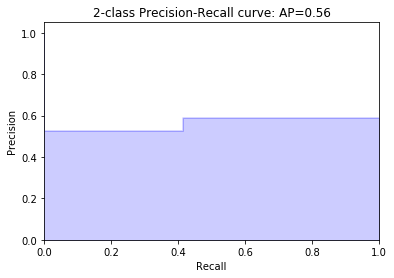

In [50]:

#Precision-Recall Curve Plot
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_actu, pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))